## Test: Calculating Lensed Ellipticity for BCGs

### Aidan Cloonan

### August 2020

I'll be utilizing the same method for ellipticity calculation on the redMaPPer central galaxies as identified from the quantity `id_cen_0`. This should be easily applicable to any of the other central IDs.

**Note**: This [notebook](https://github.com/LSSTDESC/DC2-analysis/blob/23eab0916a0f677fb87eb24f1d9b2f5031114993/contributed/redmapper_python1.ipynb), also found in the "contributed" folder within DC2-analysis, seems to refer to `id_cen_0` as the "cluster central." This might be what I'm looking for.

The probability quantities, `p_cen_0` through `p_cen_4`, seem to refer to the likelihood that this particular central galaxy is the BCG. Therefore, I've included a repeat of the method at the end of this notebook, but filtering out IDs with lower `p_cen_0` values.

In [1]:
# math, array manipulation, etc.
import numpy as np
import esutil                    # must use desc-stack kernel

# get central galaxy/BCG and cluster member data
import GCRCatalogs as gcr

# astropy
import astropy.io.fits as fits                                  # writing to and opening FITS files
from astropy.cosmology import FlatLambdaCDM, WMAP7              # making cosmological calculations
from astropy import units as u                                  # units
from astropy.table import Table                                 # Table data structure

# for timing loops 
from tqdm import *
import time

# plots
import matplotlib.pyplot as plt
%matplotlib inline

### Compile Cluster and Member Data

In [2]:
# get the redMaPPer catalog
redM_gcr = gcr.load_catalog('cosmoDC2_v1.1.4_redmapper_v0.5.7')

In [3]:
# list all redMaPPer quantities
redM_quantities = redM_gcr.list_all_quantities()
print("All redMaPPer quantities:\n")
print(redM_quantities)

# these are the quantities that describe the clusters and the central galaxies
cluster_quantities = [q for q in redM_quantities if 'member' not in q]
print("\nCluster quantities:\n")
print(cluster_quantities)

# these are the quantities that describe each cluster's member galaxies
member_quantities = [q for q in redM_quantities if 'member' in q]
print("\nMember quantities:\n")
print(member_quantities)

All redMaPPer quantities:

['magerr_y_lsst_member', 'magerr_g_lsst_member', 'theta_r_member', 'p_cen_0', 'id_cen_2', 'p_cen_1', 'theta_i_member', 'redshift', 'dec_cen_3', 'ra_member', 'magerr_r_lsst_member', 'scaleval', 'redshift_true_cg', 'ra_cen_0', 'id_cen_0', 'id_cen_1', 'ra_cen_2', 'mag_y_lsst_member', 'p_cen_2', 'magerr_i_lsst_member', 'ra_cen_3', 'cluster_id', 'richness_err', 'id_cen_4', 'ra_cen_1', 'id_cen_3', 'refmag_err_member', 'richness', 'dec', 'magerr_z_lsst_member', 'dec_cen_4', 'ra_cen_4', 'dec_cen_2', 'dec_member', 'refmag_member', 'maskfrac', 'p_member', 'dec_cen_1', 'cluster_id_member', 'id_member', 'redshift_err', 'p_cen_3', 'pfree_member', 'ra', 'redshift_true_member', 'mag_r_lsst_member', 'mag_g_lsst_member', 'p_cen_4', 'mag_z_lsst_member', 'mag_i_lsst_member', 'dec_cen_0']

Cluster quantities:

['p_cen_0', 'id_cen_2', 'p_cen_1', 'redshift', 'dec_cen_3', 'scaleval', 'redshift_true_cg', 'ra_cen_0', 'id_cen_0', 'id_cen_1', 'ra_cen_2', 'p_cen_2', 'ra_cen_3', 'cluster

In [4]:
# get cluster data
redM_data = Table(redM_gcr.get_quantities(cluster_quantities))

# get member data
mem_data = Table(redM_gcr.get_quantities(member_quantities))

In [5]:
# filter out duplicate galaxies from mem_data
uniq_mem_id, uniq_mem_ind = np.unique(mem_data['id_member'], return_index=True)
filtered_mem_data = mem_data[uniq_mem_ind]
print("There are {} unique cluster members in the data.".format(len(filtered_mem_data)))

There are 209096 unique cluster members in the data.


In [6]:
# extract BCG galaxy IDs
bcg_ids_0 = redM_data['id_cen_0']
cen_ids_1 = redM_data['id_cen_1']

In [7]:
print(np.min(bcg_ids_0))
print(np.max(bcg_ids_0))

1250061469
12065849446


The mean probabilty of cen_0 is 0.92894375
The median probability of cen_0 is 0.995431


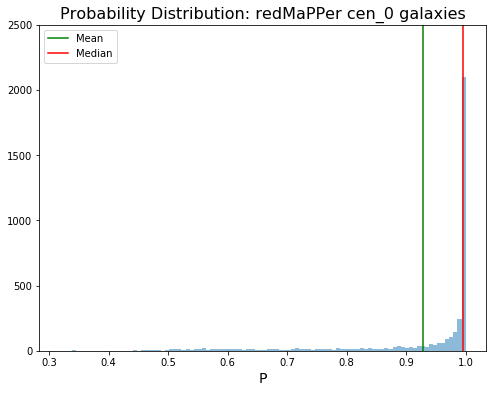

In [8]:
# let's plot probability distributions

# p_cen_0
# create linear space for plotting the mean and median
y = np.linspace(-1, 1e5, 5)
x_mean = 0*y + np.mean(redM_data['p_cen_0'])
x_med = 0*y + np.median(redM_data['p_cen_0'])

print("The mean probabilty of cen_0 is", np.mean(redM_data['p_cen_0']))
print("The median probability of cen_0 is", np.median(redM_data['p_cen_0']))

plt.figure(figsize=(8,6))
plt.hist(redM_data['p_cen_0'], bins=100, alpha=0.5)
plt.plot(x_mean, y, 'g', label=r'Mean')
plt.plot(x_med, y, 'r', label=r'Median')
plt.legend(loc='best')
plt.xlabel(r'P', fontsize=14)
#plt.xlim(-.04,1)
plt.ylim(0,2500)
plt.title('Probability Distribution: redMaPPer cen_0 galaxies', fontsize=16)
plt.show()

The mean probabilty of cen_0 is 0.06086133
The median probability of cen_0 is 0.0038152558


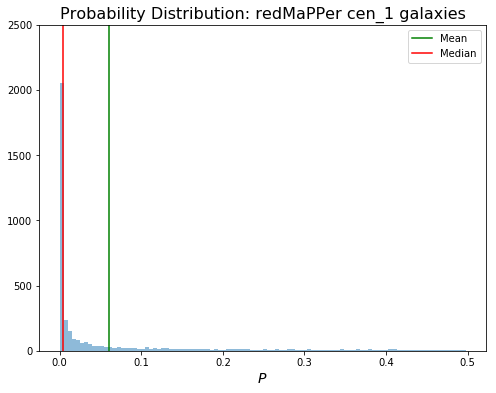

In [9]:
# p_cen_1
# create linear space for plotting the mean and median
y = np.linspace(-1, 1e5, 5)
x_mean = 0*y + np.mean(redM_data['p_cen_1'])
x_med = 0*y + np.median(redM_data['p_cen_1'])

print("The mean probabilty of cen_0 is", np.mean(redM_data['p_cen_1']))
print("The median probability of cen_0 is", np.median(redM_data['p_cen_1']))

plt.figure(figsize=(8,6))
plt.hist(redM_data['p_cen_1'], bins=100, alpha=0.5)
plt.plot(x_mean, y, 'g', label=r'Mean')
plt.plot(x_med, y, 'r', label=r'Median')
plt.legend(loc='best')
plt.xlabel(r'$P$', fontsize=14)
#plt.xlim(-.04,1)
plt.ylim(0,2500)
plt.title('Probability Distribution: redMaPPer cen_1 galaxies', fontsize=16)
plt.show()

In [10]:
i = 3
cluster = redM_data[i]
print(cluster['p_cen_0'] 
      + cluster['p_cen_1'] 
      + cluster['p_cen_2']
      + cluster['p_cen_3']
      + cluster['p_cen_4'])

1.0


In [11]:
# just to make sure, let's make sure the p values in redM_data add up to about 1.0
for i in range(len(redM_data)):
    cluster = redM_data[i]
    p_values = np.array([cluster['p_cen_0']
                         , cluster['p_cen_1']
                         , cluster['p_cen_2']
                         , cluster['p_cen_3']
                         , cluster['p_cen_4']])
    p_values_sum = np.sum(p_values)
    if p_values_sum < 0.9999 or p_values_sum > 1.00001:
        raise ValueError('P values at index {} don\'t add up to 1.0.'.format(i))

### Cosmology Definition

This needs to be agreement with the cosmoDC2 v1.1.4 parameters, as defined with this [link](https://github.com/LSSTDESC/gcr-catalogs/blob/master/GCRCatalogs/catalog_configs/cosmoDC2_v1.1.4_image.yaml).

**NOTES:**

How can I account for $\sigma_{8}$ and $n_{s}$? These values are outlined in the link provided above, but I haven't found any `astropy` documentation so far on either of these parameters.

I didn't account for this in the matching algorithms, so I'll need to run them again in order to approximate comoving distance more accurately. As of now, I've copied the following cosmology definition and placed it around Input 32 in the matching notebook. I'll look into running the notebook again once I've figured out those two parameters.

**Update**: Got it! After loading the catalog, you can simply use the following:

In [12]:
cosmo = redM_gcr.cosmology
cosmo

FlatLambdaCDM(H0=71 km / (Mpc s), Om0=0.265, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=0.0448)

### Compile Lensing Data

In [13]:
# get the cosmoDC2 catalog
cosmoDC2_gcr = gcr.load_catalog('cosmoDC2_v1.1.4_image')

In [14]:
# list the lensing quantities we want
lensing_quantities = ['galaxy_id'
                      , 'shear_1'
                      , 'shear_2'
                      , 'ellipticity_1_true'
                      , 'ellipticity_2_true'
                      , 'convergence'
                      , 'halo_mass'
                      , 'halo_id'
                     ]

min_id = np.min(bcg_ids_0)
max_id = np.max(bcg_ids_0)
min_ra = np.min(redM_data['ra_cen_0'])
max_ra = np.max(redM_data['ra_cen_0'])
min_dec = np.min(redM_data['dec_cen_0'])
max_dec = np.max(redM_data['dec_cen_0'])

In [15]:
# load in cosmoDC2 data
# the halo mass limit that I've used here is the smallest mass of an id_cen_1 galaxy 
# (from redM table)
# (just in case we want to use the id_cen_1 galaxies for anything)
lensing_data = Table(cosmoDC2_gcr.get_quantities(lensing_quantities
                                                 , filters=['halo_mass > 3.487e11'
                                                            , 'galaxy_id >= {}'.format(min_id)
                                                            , 'galaxy_id <= {}'.format(max_id)
                                                            , 'ra > {}'.format(min_ra - 0.01)
                                                            , 'ra < {}'.format(max_ra + 0.01)
                                                            , 'dec > {}'.format(min_dec - 0.01)
                                                            , 'dec < {}'.format(max_dec + 0.01)
                                                           ]
                                                )
                    )

In [16]:
# filter out duplicate galaxy IDs
uniq_dc2_ids, uniq_dc2_ind = np.unique(lensing_data['galaxy_id'], return_index=True)
filtered_lensing_data = lensing_data[uniq_dc2_ind]
print("There are {} unique galaxies in the data.".format(len(filtered_lensing_data)))

There are 107161209 unique galaxies in the data.


In [17]:
# since this length is the same as our filtered length, there's no need to filter out
# duplicate IDs here
len(lensing_data)

107161209

In [18]:
# find indices where id_cen_0 values can be found
bcg_redM_ind, bcg_lens_ind = esutil.numpy_util.match(bcg_ids_0, lensing_data['galaxy_id'])

In [19]:
# repeat for id_cen_1
# i don't end up using them for anything here, but we can later down the road if we want
cen1_redM_ind, cen1_lens_ind = esutil.numpy_util.match(cen_ids_1, lensing_data['galaxy_id'])

In [20]:
# check that all 3895 galaxies were found
print("We found {} of the redMaPPer galaxies in the dataset.".format(bcg_lens_ind.size))
#print(cen1_lens_ind.size)

We found 3895 of the redMaPPer galaxies in the dataset.


In [21]:
# here is how I determined the halo mass limit I'd use above
print("The smallest DM halo in the BCG dataset has a mass of {:e} solar masses.".format(np.min(lensing_data[bcg_lens_ind]['halo_mass'])))
#print(np.min(lensing_data[cen1_lens_ind]['halo_mass']))

The smallest DM halo in the BCG dataset has a mass of 4.268507e+11 solar masses.


In [22]:
# extract cen_0, add cluster IDs
bcg_lensing_data = lensing_data[bcg_lens_ind]
bcg_lensing_data['cluster_id'] = redM_data[bcg_redM_ind]['cluster_id']

In [23]:
# extract cen_1, add cluster IDs
cen1_lensing_data = lensing_data[cen1_lens_ind]
cen1_lensing_data['cluster_id'] = redM_data[cen1_redM_ind]['cluster_id']

### Calculate Lensed Ellipticity

In [24]:
# first, compile a bunch of necessary columns
bcg_shear1 = bcg_lensing_data['shear_1']
bcg_shear2 = bcg_lensing_data['shear_2']
bcg_e1 = bcg_lensing_data['ellipticity_1_true']
bcg_e2 = bcg_lensing_data['ellipticity_2_true']
bcg_kappa = bcg_lensing_data['convergence']

In [25]:
# now, let's define a function to find lensed ellipticity
def calc_lensed_ellipticity(gamma1, gamma2, e_t1, e_t2, kappa):
    '''
    This function utilizes relations between shear, convergence, and the true ellipticity 1 and 2 values in order to
    calculate the lensed ellipticity.
    
    Inputs:
        
        gamma1             |    The quantity 'shear_1'
        
        gamma2             |    The quantity 'shear_2'
        
        e_t1               |    The quantity 'ellipticity_1_true'
        
        e_t2               |    The quantity 'ellipticity_2_true'
        
        kappa              |    The quantity 'convergence'
        
    Output:
    
        np.abs(e)          |    The absolute value of the complex number e, as calculated below. Note that the
                                absolute value of a complex number, a + b*1j, is found with (a**2 + b**2) ** 0.5.
                                This is the distance formula of a complex number plotted on the complex plane.
    '''
    gamma = gamma1 + gamma2*1j                     # shear (as a complex number, note that 1j is the imaginary number)
    e_t = e_t1 + e_t2*1j                           # true or intrinsic ellipticity (as a complex number)
    g = gamma / (1.0 - kappa)                      # reduced shear
    e = (e_t + g) / (1.0 + (e_t * g.conjugate()))  # lensed ellipticity
    
    # return lensed ellipticity
    return np.abs(e)

In [26]:
# calculate lensed ellipticity for the BCGs
bcg_lensing_data['ellipticity'] = calc_lensed_ellipticity(bcg_shear1
                                                         , bcg_shear2
                                                         , bcg_e1
                                                         , bcg_e2
                                                         , bcg_kappa)

In [27]:
# add ellipticity and p_cen_0 values to table
bcg_lensed_e = bcg_lensing_data['ellipticity']
bcg_lensing_data['p_bcg'] = redM_data[bcg_redM_ind]['p_cen_0']
bcg_lensing_data

galaxy_id,halo_mass,ellipticity_2_true,shear_1,shear_2,convergence,halo_id,ellipticity_1_true,cluster_id,ellipticity,p_bcg
int64,float64,float64,float64,float64,float64,int64,float64,int32,float64,float32
9437527620,228279662101633.8,0.003769422785477183,-0.0007697509428568061,-0.0014737822430902921,0.00039156484046465323,95400151411,0.00722568075838464,1740,0.006851532386307819,0.9999929
9437528172,263934081687436.62,-0.20228976433389084,-0.00328169668927214,-0.0005688164564912625,0.0016665777636637458,130200151411,-0.2834333736271504,300,0.35085998689208164,0.9999822
9437586902,162421527739492.97,-0.02680302685824229,-0.0004394014683647418,-0.00015070944467250832,0.0007211023331906707,349000151382,0.357980107474647,3951,0.3586099308497207,0.83419436
9437613919,91472258570095.78,-0.02758046555434631,0.0019374798743139188,-0.0005367683282988017,-0.0016123451413510015,48900151373,-0.08816026282989228,3458,0.0907083192894198,0.99927896
9437618605,198075947325295.78,-0.019443276528079985,0.001890169482736126,0.0007028418489569953,-0.0021991762259641057,397900151373,-0.024553340225520564,2674,0.029413818952691115,0.99830854
9437691052,113040273581070.42,0.011418073314749493,-0.006476297929713992,0.0013199767908285516,0.0011197740461639238,357100151355,-0.01621327322046872,3494,0.026024583178333522,0.9011545
9437691520,154662656086535.22,0.04676146594069114,-0.0035776357322009344,-0.002714197856499505,-0.0014525111872583096,388500151355,0.05301962478485993,1100,0.0662442926373282,0.99121207
9437692846,225225499893183.12,-0.07615315223818733,0.004679993904495694,-0.007352020921321863,0.005582208395767507,481800151355,0.15847286929204912,1515,0.1830836289678146,0.9163672
9437749675,140431559838647.89,-0.06217807473443483,0.00125683781270991,-0.0030641501454618993,0.003539346170416513,413000151347,-0.16990738040430092,2081,0.18083408751058988,0.8554523


The mean lensed ellipticity is 0.09882384433209922
The median lensed ellipticity is 0.06555156470000469


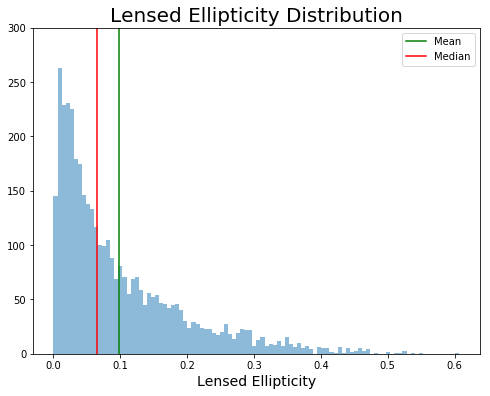

In [28]:
# let's plot the distribution

# create linear space for plotting the mean and median
y = np.linspace(-1, 1e5, 5)
x_mean = 0*y + np.mean(bcg_lensed_e)
x_med = 0*y + np.median(bcg_lensed_e)

print("The mean lensed ellipticity is", np.mean(bcg_lensed_e))
print("The median lensed ellipticity is", np.median(bcg_lensed_e))

plt.figure(figsize=(8,6))
plt.hist(bcg_lensed_e, bins=100, alpha=0.5)
plt.plot(x_mean, y, 'g', label=r'Mean')
plt.plot(x_med, y, 'r', label=r'Median')
plt.legend(loc='best')
plt.xlabel(r'Lensed Ellipticity', fontsize=14)
#plt.xlim(-.04,1)
plt.ylim(0,300)
plt.title('Lensed Ellipticity Distribution', fontsize=20)
plt.show()

In [29]:
# write to FITS file
bcg_lensing_data.write('../fits_files/bcg_lensed_data_with_lensed_ellipticity_cosmoDC2_redM.fits'
                       , format='fits')

What if we only took cases where `p_cen_0` $\ge 0.9$?

In [30]:
# open our new FITS file
bcg_hdu = fits.open('../fits_files/bcg_lensed_data_with_lensed_ellipticity_cosmoDC2_redM.fits')

# extract dataset
bcg_table = Table(bcg_hdu[1].data)

In [31]:
# find indices where p_cen_0 >= 0.9
# note that i defined p_cen_0 as p_bcg in this FITS table
pcen0_90_ind = np.where(bcg_table['p_bcg'] >= 0.9)

# extract these BCGs
bcg_table_pcen0_90 = bcg_table[pcen0_90_ind]

In [32]:
# first, compile a bunch of necessary columns
bcg_pcen0_90_shear1 = bcg_table_pcen0_90['shear_1']
bcg_pcen0_90_shear2 = bcg_table_pcen0_90['shear_2']
bcg_pcen0_90_e1 = bcg_table_pcen0_90['ellipticity_1_true']
bcg_pcen0_90_e2 = bcg_table_pcen0_90['ellipticity_2_true']
bcg_pcen0_90_kappa = bcg_table_pcen0_90['convergence']

In [33]:
# calculate lensed ellipticity for the BCGs
bcg_table_pcen0_90['ellipticity'] = calc_lensed_ellipticity(bcg_pcen0_90_shear1
                                                                   , bcg_pcen0_90_shear2
                                                                   , bcg_pcen0_90_e1
                                                                   , bcg_pcen0_90_e2
                                                                   , bcg_pcen0_90_kappa
                                                                  )

In [34]:
# add ellipticity values to table
bcg_pcen0_90_e = bcg_table_pcen0_90['ellipticity']
bcg_table_pcen0_90

galaxy_id,halo_mass,ellipticity_2_true,shear_1,shear_2,convergence,halo_id,ellipticity_1_true,cluster_id,ellipticity,p_bcg
int64,float64,float64,float64,float64,float64,int64,float64,int32,float64,float32
9437527620,228279662101633.8,0.003769422785477183,-0.0007697509428568061,-0.0014737822430902921,0.00039156484046465323,95400151411,0.00722568075838464,1740,0.006851532386307819,0.9999929
9437528172,263934081687436.62,-0.20228976433389084,-0.00328169668927214,-0.0005688164564912625,0.0016665777636637458,130200151411,-0.2834333736271504,300,0.35085998689208164,0.9999822
9437613919,91472258570095.78,-0.02758046555434631,0.0019374798743139188,-0.0005367683282988017,-0.0016123451413510015,48900151373,-0.08816026282989228,3458,0.0907083192894198,0.99927896
9437618605,198075947325295.78,-0.019443276528079985,0.001890169482736126,0.0007028418489569953,-0.0021991762259641057,397900151373,-0.024553340225520564,2674,0.029413818952691115,0.99830854
9437691052,113040273581070.42,0.011418073314749493,-0.006476297929713992,0.0013199767908285516,0.0011197740461639238,357100151355,-0.01621327322046872,3494,0.026024583178333522,0.9011545
9437691520,154662656086535.22,0.04676146594069114,-0.0035776357322009344,-0.002714197856499505,-0.0014525111872583096,388500151355,0.05301962478485993,1100,0.0662442926373282,0.99121207
9437692846,225225499893183.12,-0.07615315223818733,0.004679993904495694,-0.007352020921321863,0.005582208395767507,481800151355,0.15847286929204912,1515,0.1830836289678146,0.9163672
9437807130,291442335859380.3,-0.06932965809802626,0.002123115674019904,0.0008930002489736305,-0.003540216135418106,649700151338,-0.02352766729352598,346,0.07171910075631245,0.99973536
9437809979,103602262535211.27,-0.0029052271626874514,0.006684245706747971,-0.0003630620375549442,-0.002890614584542428,857900151338,-0.009315922041587899,1977,0.004207675263258463,0.9815309


The mean lensed ellipticity for p_cen_0 >= 0.9 is 0.09860065858504875
The median lensed ellipticity for p_cen_0 >= 0.9 is 0.06536976309359102


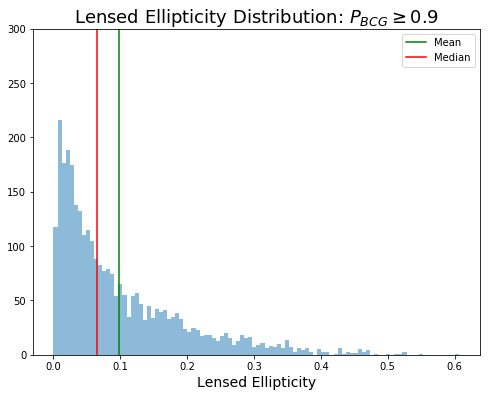

In [36]:
# let's plot the distribution

# create linear space for plotting the mean and median
y = np.linspace(-1, 1e5, 5)
x_mean = 0*y + np.mean(bcg_pcen0_90_e)
x_med = 0*y + np.median(bcg_pcen0_90_e)

print(r'The mean lensed ellipticity for p_cen_0 >= 0.9 is', np.mean(bcg_pcen0_90_e))
print(r'The median lensed ellipticity for p_cen_0 >= 0.9 is', np.median(bcg_pcen0_90_e))

plt.figure(figsize=(8,6))
plt.hist(bcg_pcen0_90_e, bins=100, alpha=0.5)
plt.plot(x_mean, y, 'g', label=r'Mean')
plt.plot(x_med, y, 'r', label=r'Median')
plt.legend(loc='best')
plt.xlabel(r'Lensed Ellipticity', fontsize=14)
#plt.xlim(-.04,1)
plt.ylim(0,300)
plt.title(r'Lensed Ellipticity Distribution: $P_{BCG} \geq 0.9$', fontsize=18)
plt.show()

Factoring out all cases where `p_cen_0` $< 0.9$ appears to have very minimal effect on the distribution. The difference between the two medians is only about 0.002, and the distribution retains its shape, with most BCGs having an ellipticity between 0 and 0.1.